In [13]:
#导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']# 用来正常显示中文标签
from datetime import datetime

# 1.初识数据

In [18]:
df = pd.read_csv('kelu.csv')
df.info()
# 基本信息：门票价格101，数据来自16年~19年，8K+多数据量
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     8757 non-null   object
 1   rating     8757 non-null   int64 
 2   time       8757 non-null   object
 3   year       8757 non-null   int64 
 4   amount     8757 non-null   int64 
 5   frequency  8757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


,author,rating,time,year,amount,frequency
0,YOUNG,60,2019/2/28,2019,110,1
1,SHING YAN,100,2019/2/28,2019,110,1
2,Sha,60,2019/2/28,2019,110,1
3,Mary Mae,100,2019/2/28,2019,110,1
4,Maria Cristina,100,2019/2/28,2019,110,1


In [16]:
df.describe()
#根据平均分92，和1/2分位得知，大多数用户评分在100，效果非常不错。
#16年~19年门票价格都是110


,rating,year,amount,frequency
count,8757.000000,8757.000000,8757.0,8757.0
mean,92.417495,2017.760420,110.0,1.0
std,14.231179,0.686734,0.0,0.0
min,20.000000,2016.000000,110.0,1.0
25%,80.000000,2017.000000,110.0,1.0
50%,100.000000,2018.000000,110.0,1.0
75%,100.000000,2018.000000,110.0,1.0
max,100.000000,2019.000000,110.0,1.0


# 2.分析数据

## a1.每天销量分析

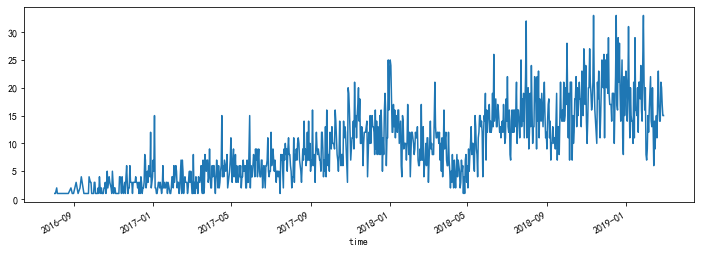

In [23]:
df['time'] = pd.to_datetime(df['time'],format='%Y/%m/%d')
df.groupby('time')['rating'].count().plot(figsize=(12,4))
#整体来看每日销量呈现上升趋势，但是在18年5月份前后（2，3，4）出现一次较大的波动，销量急剧下滑，猜测：台风，疫情，运营推广不利
#16年9月~17年1月，销量非常低，每天平均2-3张门票，猜测：101观景台门票刚刚上线发售，观景台刚刚对游客进行开放

## a2.每月销量分析

Text(0.5, 1.0, '16~19年每月销量分析')

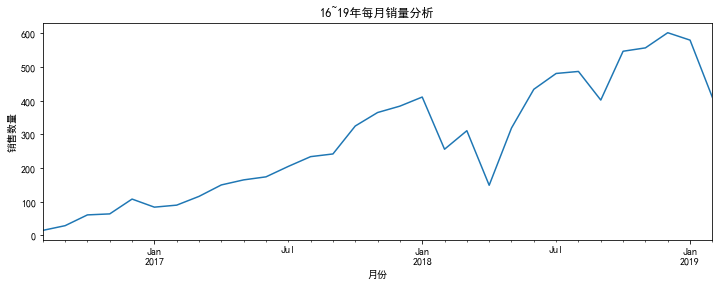

In [25]:
df['month'] = df['time'].values.astype('datetime64[M]')  #保留月份精度的日期
df.head()
df.groupby('month')['rating'].count().plot(figsize=(12,4))  #按照月份进度进行计数
plt.xlabel('月份')
plt.ylabel('销售数量')
plt.title('16~19年每月销量分析')
#月份整体销量依然呈现上升趋势，但是在18年2，3，4月份月销量下滑明显。跟每天销量下降有关。猜测：台风，疫情，运营推广不利

## a3.每个用户的购买量和消费金额分析

In [37]:
#merge用法，相当于sql当中join：
df1 = pd.DataFrame({
    'name':['zhangsan','lisi'],
    'group':['A','B']
})
df2 =  pd.DataFrame({
    'name':['wangwu','lisi'],
    'score':[88,90],
    'group':['C','D']
})
pd.merge(left=df1,right=df2,on='name',how='inner',suffixes=['_1','_2'])
#left：左表   right:右表   on：关联字段 how：inner（默认值，交集）|outer（并集）|left（只保留左侧）|right（只保留右侧）
#suffixes:如果两个表中有多个相同列，用suffixes给的值进行区分(默认值xy)

,name,group_1,score,group_2
0,lisi,B,90,D


Text(0, 0.5, '消费金额')

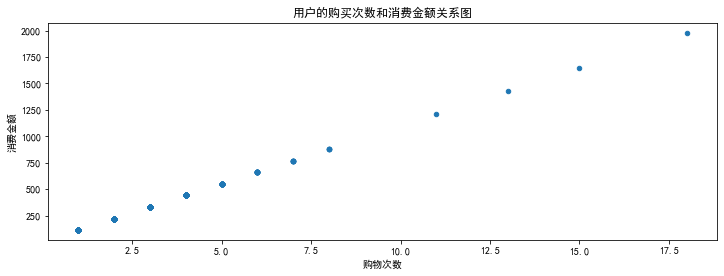

In [53]:
#按照游客分组，统计每个游客的购买次数
grouped_count_author = df.groupby('author')['frequency'].count().reset_index() 
#按照游客分组，统计每个游客的消费金额
grouped_sum_amount = df.groupby('author')['amount'].sum().reset_index()
user_purchase_retention = pd.merge(left=grouped_count_author,
                                  right=grouped_sum_amount,
                                  on='author',
                                  how='inner')
user_purchase_retention.tail(60)
user_purchase_retention.plot.scatter(x='frequency',y='amount',figsize=(12,4))
plt.title('用户的购买次数和消费金额关系图')
plt.xlabel('购物次数')
plt.ylabel('消费金额')
#结论：斜率就是门票价格110，用户的消费金额和消费次数呈现线性关系

## b1.用户购买门票数量分析

Text(0.5, 1.0, '用户购买门票数量直方图')

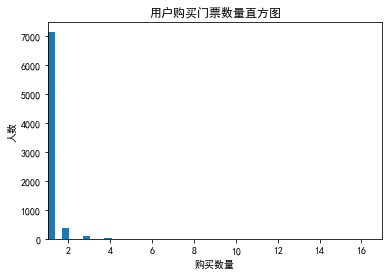

In [57]:
df.groupby('author')['frequency'].count().plot.hist(bins=50)  #影响柱子的宽度，宽度= （最大值-最小值）/bins
plt.xlim(1,17)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('用户购买门票数量直方图')
#绝大多数用户购买过1张门票，用户在7000人次左右
# 少数人购买过2~4张门票，猜测：可能是台北周边用户

## b2.用户购买门票2次及以上情况分析

Text(0.5, 1.0, '购买门票在2次及以上的用户数量')

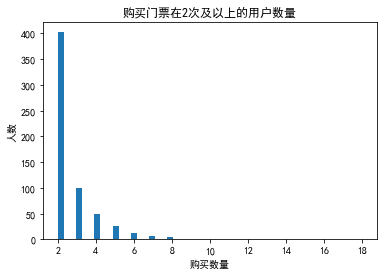

In [73]:
df_frequency_2 = df.groupby('author').count().reset_index()
df_frequency_2.head()
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().plot.hist(bins=50)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('购买门票在2次及以上的用户数量')
#消费两次的用户在整体上占比较大，大于2次的用户占小部分，用户购买次数最多为8次

## b3.查看购买2次及以上的具体人数

In [75]:
df_frequency_2[df_frequency_2['frequency']>=2].groupby('frequency')['author'].count()
#出去购买一次的顾客，可以看出购买2次有402人，购买3次的99人，以此类推得知大多数据倾向于购买2~5

frequency
2     402
3      99
4      49
5      25
6      13
7       7
8       4
11      1
13      1
15      1
18      1
Name: author, dtype: int64

## b4.购买次数在1~5次之间的用户占比分析

[7119, 804, 297, 196, 125]


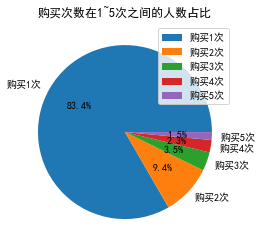

In [103]:
#1.按照用户进行分组  2.取出购买次数  3.过滤出1~5次用户  4.绘制饼图
df_frequency_gte_1 = df.groupby('author')['frequency'].count().reset_index()
#过滤出<=5次的用户
values = list(df_frequency_gte_1[df_frequency_gte_1['frequency']<=5].groupby('frequency')['frequency'].sum())
print(values)
plt.pie(values,labels=['购买1次','购买2次','购买3次','购买4次','购买5次'],autopct='%1.1f%%')
plt.title('购买次数在1~5次之间的人数占比')
plt.legend()
#可以看出购买一次的占比83%，其次逐渐递减。并且递减比较明显，购买3.4.5的占比相近，人数都很少。

## b5.购买次数在2~5次之间的用户占比分析

[804, 297, 196, 125]


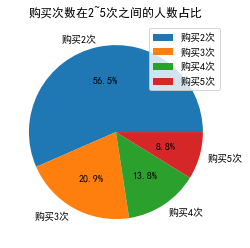

In [107]:
#过滤出>=2次并且<=5次的用户
df_frequency_gte_2 = df_frequency_2[df_frequency_2['frequency']>=2].reset_index()
values = list(df_frequency_gte_2[df_frequency_gte_2['frequency']<=5].groupby('frequency')['frequency'].sum())
print(values)
plt.pie(values,labels=['购买2次','购买3次','购买4次','购买5次'],autopct='%1.1f%%')
plt.title('购买次数在2~5次之间的人数占比')
plt.legend()
#在2~5次之间，购买2.3次用户占比最大，综合占据了80%

## c1.复购率分析

Text(0.5, 1.0, '16~19年每月用户复购率')

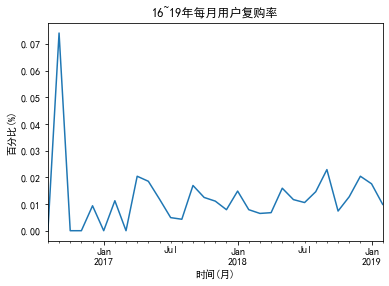

In [131]:
#复购率：在某一时间窗口内(多指一个月)内消费次数在两次及以上的用户在总消费用户的占比
df.head()
pivot_count = df.pivot_table(index='author',
                            columns='month',
                            values='frequency',
                            aggfunc='count').fillna(0)
pivot_count.head()
#三种情况：
#消费次数>1，为复购用户，用1表示
#消费次数=1，为非复购用户，用0表示
#消费次数=0, 未消费用户，用na表示
#applymap:df，处理每一个元素
#apply:df，处理每一行或者每一列数据
#map:Serise，处理每一个元素
pivot_count = pivot_count.applymap(lambda x: 1 if x>1 else np.NAN  if x==0 else 0)
# pivot_count[pivot_count['2016-09-01']==1]
(pivot_count.sum()/pivot_count.count()).plot()
plt.xlabel('时间(月)')
plt.ylabel('百分比(%)')
plt.title('16~19年每月用户复购率')
#16年9月份复购率最高达到了7.5%，然后开始下降，趋于平稳在1.2%

## c2.复购用户人数

Text(0.5, 1.0, '16~19年每月的复购人数折线图')

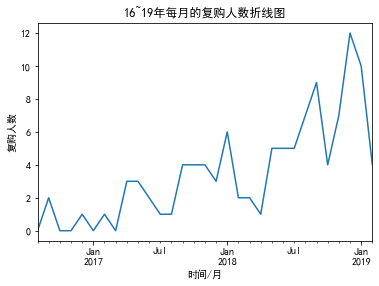

In [134]:
pivot_count.sum().plot()
plt.xlabel('时间/月')
plt.ylabel('复购人数')
plt.title('16~19年每月的复购人数折线图')
#整体来看，复购人数长线上升趋势
#但是在18年2.3.4.10和19年2月份，复购人数下降较为明显，出现异常信号，需要和业务部门具体分析情况